# ImageCollection

An ImageCollection is a stack or time series of images. In addition to loading an ImageCollection using an Earth Engine collection ID, Earth Engine has methods to create image collections. The constructor `ee.ImageCollection()` or the convenience method `ee.ImageCollection.fromImages()` create image collections from lists of images. While single images are great to do quick analytics, the true power of the Earth Engine environment comes with the possibility of looking at really large and heavy image collections and to be able to push analysis towards the data, rather than the need for the data to travel at all. In the GEE environment image collections have their own characteristic setup and are composted with single images that we discussed earlier. They can often have the same or different band structure but generally share a similar metadata structure for filtering and querying.

Large scale image collections such as Landsat and Sentinel image collections are ingested on the fly and are actively maintained till there imagery and processing pipelines feeds are maintained byt he agencies supplying the imagery. Images as well as image collections can be moved into GEE environment to allow you to use both your data and the GEE catalog data within the same platform.

These image collection as well as individual images again have defined data type,scales and projections along with some default properties such as an index and ID among other system properties. To have a look at all of the raster catalog you can find them listed [here](https://developers.google.com/earth-engine/datasets/catalog/). 

You can also create new image collections by merging existing collections.

In [1]:
# Import earthengine API
import ee
# Authenticate and initialise 
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=r-VxAu1Ie3xp_NdqLFQkQJ6bvCaHZMzFxIj4JIYu84g&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AfDhmrh0hz92Eaa4kgEXW-Udu2h6xU9XuBwrPAQbXXLtM2oZHvjdrTynLAw

Successfully saved authorization token.


In [2]:
# Create arbitary constant images
constant1 = ee.Image(1)
constant2 = ee.Image(2)

# Create a collection by giving a list to the constructor.
collectionFromConstructor = ee.ImageCollection([constant1, constant2])
print('collectionFromConstructor: ', collectionFromConstructor.getInfo())

# Create a collection with fromImages().
collectionFromImages = ee.ImageCollection.fromImages([ee.Image(3), ee.Image(4)])
print('collectionFromImages: ', collectionFromImages.getInfo());

# Merge two collections.
mergedCollection = collectionFromConstructor.merge(collectionFromImages);
print('mergedCollection: ', mergedCollection.getInfo());

collectionFromConstructor:  {'type': 'ImageCollection', 'bands': [], 'features': [{'type': 'Image', 'bands': [{'id': 'constant', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 1, 'max': 1}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}], 'properties': {'system:index': '0'}}, {'type': 'Image', 'bands': [{'id': 'constant', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 2, 'max': 2}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}], 'properties': {'system:index': '1'}}]}
collectionFromImages:  {'type': 'ImageCollection', 'bands': [], 'features': [{'type': 'Image', 'bands': [{'id': 'constant', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 3, 'max': 3}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}], 'properties': {'system:index': '0'}}, {'type': 'Image', 'bands': [{'id': 'constant', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 4, 'max': 4}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]

## Image Collection metadata and information

As with Images, there are a variety of ways to get information about an ImageCollection. The collection can be printed directly to the console, but the console printout is limited to 5000 elements. Collections larger than 5000 images will need to be filtered before printing. Printing a large collection will be correspondingly slower. The following example shows various ways of getting information about image collections programmatically:

In [3]:
import pprint

# Configure the pretty printing output & initialize earthengine.
pp = pprint.PrettyPrinter(depth=4)

# Load a Landsat 8 ImageCollection for a single path-row.
collection = (ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA')
    .filter(ee.Filter.eq('WRS_PATH', 44))
    .filter(ee.Filter.eq('WRS_ROW', 34))
    .filterDate('2014-03-01', '2014-08-01'))
#pp.pprint('Collection: '+str(collection.getInfo())+'\n')

# Get the number of images.
count = collection.size()
print('Number of images in collection: ', str(count.getInfo())+'\n')

# Get the date range of images in the collection.
range = collection.reduceColumns(ee.Reducer.minMax(), ["system:time_start"])
print('Date range: ', str(ee.Date(range.get('min')).getInfo()), str(ee.Date(range.get('max')).getInfo())+'\n')

# Get statistics for a property of the images in the collection.
sunStats = collection.aggregate_stats('SUN_ELEVATION')
pp.pprint('Sun elevation statistics: '+str(sunStats.getInfo())+'\n')

# Sort by a cloud cover property, get the least cloudy image.
image = ee.Image(collection.sort('CLOUD_COVER').first())
print('Least cloudy image: ', str(image.getInfo())+'\n')

# Limit the collection to the 5 most recent images.
recent = collection.sort('system:time_start', False).limit(5)
#pp.pprint('Recent images: '+str(recent.getInfo())+'\n')

# Get size of collection in bytes
print('Total size of Collection with 5 most recent images : '+str((recent.reduceColumns(ee.Reducer.sum(), ['system:asset_size']).getInfo()['sum'])))

Number of images in collection:  9

Date range:  {'type': 'Date', 'value': 1395168392050} {'type': 'Date', 'value': 1406227557220}

("Sun elevation statistics: {'max': 67.10252380371094, 'mean': "
 "61.01998392740885, 'min': 46.471065521240234, 'sample_sd': "
 "7.251804209519804, 'sample_var': 52.58866429320915, 'sum': "
 "549.1798553466797, 'sum_sq': 33931.65526085679, 'total_count': 9, "
 "'total_sd': 6.837066576518139, 'total_var': 46.74547937174147, "
 "'valid_count': 9, 'weight_sum': 9, 'weighted_sum': 549.1798553466797}\n")
Least cloudy image:  {'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 

## Filtering an ImageCollection


Specifically, many common use cases are handled by `imageCollection.filterDate()`, and `imageCollection.filterBounds()`. For general purpose filtering, use `imageCollection.filter()` with an `ee.Filter` as an argument. The following example demonstrates both convenience methods and `filter()` to identify and remove images with bad registration from an ImageCollection:

In [12]:
# Load Landsat 5 data, filter by date and bounds.
collection = ee.ImageCollection('LANDSAT/LT05/C01/T2').filterDate('1987-01-01', '1990-05-01').filterBounds(ee.Geometry.Point(25.8544, -18.08874))

# Also filter the collection by the IMAGE_QUALITY property.
filtered = collection.filterMetadata('IMAGE_QUALITY', 'equals', 9)

# Create two composites to check the effect of filtering by IMAGE_QUALITY.
badComposite = ee.Algorithms.Landsat.simpleComposite(collection, 75, 3) # percentile and cloud score
goodComposite = ee.Algorithms.Landsat.simpleComposite(filtered, 75, 3)    

In [13]:
# Display the composites.

import folium
#!pip install geehydro # Life saver for plotting GEE stuff with Python!
import geehydro

# Use folium to visualize the imagery.
map = folium.Map(location=[-18.08874,25.8544],zoom_start=9)

map.addLayer(goodComposite, {'bands': ['B3', 'B2', 'B1'], 'gain':3.5}, 'good composite')
map.addLayer(badComposite, {'bands': ['B3', 'B2', 'B1'], 'gain':3.5}, 'bad composite')
folium.LayerControl().add_to(map)
map

## Mapping over an ImageCollection

To apply a function to every Image in an ImageCollection use `imageCollection.map()`. The only argument to `map()` is a function which takes one parameter: an `ee.Image`. For example, the following code adds a timestamp band to every image in the collection:

In [14]:
# Load a Landsat 8 collection for a single path-row.
collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA').filter(ee.Filter.eq('WRS_PATH', 44)).filter(ee.Filter.eq('WRS_ROW', 34))

# This function adds a band representing the image timestamp.
def addTime(image):
    return image.addBands(image.metadata('system:time_start'))

# Map the function over the collection and display the result.
print(collection.map(addTime))
    

ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.map",
    "arguments": {
      "baseAlgorithm": {
        "functionDefinitionValue": {
          "argumentNames": [
            "_MAPPING_VAR_0_0"
          ],
          "body": {
            "functionInvocationValue": {
              "functionName": "Image.addBands",
              "arguments": {
                "dstImg": {
                  "argumentReference": "_MAPPING_VAR_0_0"
                },
                "srcImg": {
                  "functionInvocationValue": {
                    "functionName": "Image.metadata",
                    "arguments": {
                      "image": {
                        "argumentReference": "_MAPPING_VAR_0_0"
                      },
                      "property": {
                        "constantValue": "system:time_start"
                      }
                    }
                  }
                }
              }
            }
          }
    

The `map()` function is equivalent to a `for` loop in Earth Engine. 

The mapped function is limited in the operations it can perform. Specifically, it can’t modify variables outside the function; it can’t print anything; it can’t use ‘if’ or ‘for’ statements. However, you can use `ee.Algorithms.If()` to perform conditional operations in a mapped function. For example:

In [15]:
# This function uses a conditional statement to return the image if
# the solar elevation > 40 degrees.  Otherwise it returns a zero image.
def conditional(image):
  return ee.Algorithms.If(ee.Number(image.get('SUN_ELEVATION')).gt(60),image,ee.Image(0))

result = collection.map(conditional)

# Print it
#!pip install pprint
import pprint
# Configure the pretty printing output
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(result.getInfo())
    

Streaming output truncated to the last 5000 lines.
                              'DATE_ACQUIRED': '2017-04-27',
                              'DATUM': 'WGS84',
                              'EARTH_SUN_DISTANCE': 1.006725549697876,
                              'ELEVATION_SOURCE': 'GLS2000',
                              'ELLIPSOID': 'WGS84',
                              'FILE_DATE': 1494866291000,
                              'GEOMETRIC_RMSE_MODEL': 6.794000148773193,
                              'GEOMETRIC_RMSE_MODEL_X': 4.995999813079834,
                              'GEOMETRIC_RMSE_MODEL_Y': 4.604000091552734,
                              'GEOMETRIC_RMSE_VERIFY': 3.433000087738037,
                              'GRID_CELL_SIZE_PANCHROMATIC': 15,
                              'GRID_CELL_SIZE_REFLECTIVE': 30,
                              'GRID_CELL_SIZE_THERMAL': 30,
                              'GROUND_CONTROL_POINTS_MODEL': 461,
                              'GROUND_CONTROL_P

Inspect the list of images in the output ImageCollection and note that the when the condition evaluated by the `If()` algorithm is true, the output contains an image, if it is not true, it contains an empty image. Although this demonstrates a server-side conditional function, avoid `If()` in general and use filters instead.

## Reducing an ImageCollection

To composite images in an ImageCollection, use `imageCollection.reduce()`. This will composite all the images in the collection to a single image representing, for example, the min, max, mean or standard deviation of the images. For example, to create a median value image from a collection:

In [16]:
# Load a Landsat 8 collection for a specific date range.
collection2 = collection.filterDate('2014-01-01', '2015-01-01')

# Compute a median image and display.
median = collection2.median();

# Use folium to visualize the imagery.
map2 = folium.Map(location=[37.7726,-122.3578],zoom_start=12)
map2.addLayer(median, {'bands': ['B4', 'B3', 'B2'], 'max': 0.3}, 'median')
map2    

At each location in the output image, in each band, the pixel value is the median of all unmasked pixels in the input imagery (the images in the collection). In the previous example, `median()` is a convenience method for the following call:

In [17]:
# Reduce the collection with a median reducer.
median_bis = collection2.reduce(ee.Reducer.median())

# Display the median image.
map2.addLayer(median_bis, {'bands': ['B4_median', 'B3_median', 'B2_median'], 'max': 0.3}, 'median_bis')
folium.LayerControl().add_to(map2)
map2 

Note that the band names differ as a result of using reduce() instead of the convenience method. Specifically, the names of the reducer have been appended to the band names.

## Iterating over an ImageCollection


Although `map()` applies a function to every image in a collection, the function visits every image in the collection independently. 

Suppose you want to compute a cumulative anomaly ($A_t$) at time t from a time series. To obtain a recursively defined series of the form $A_t = f(Image_t, A_{t-1})$, mapping won't work because the function ($f$) depends on the previous result ($A_{t-1}$). 

For example, suppose you want to compute a series of cumulative Normalized Difference Vegetation Index (NDVI) anomaly images relative to a baseline. Let $A_0 = 0$ and $f(Image_t, A_{t-1}) = Image_t + A_{t-1}$ where $A_{t-1}$ is the cumulative anomaly up to time t-1 and $Image_t$ is the anomaly at time t. Use `imageCollection.iterate()` to make this recursively defined ImageCollection. 

In the following example, the function `accumulate()` takes two parameters: an image in the collection, and a list of all the previous outputs. With each call to `iterate()`, the anomaly is added to the running sum and the result is added to the list. The final result is passed to the ImageCollection constructor to get a new sequence of images:

In [18]:
# Load MODIS EVI (Enhanced Vegetation index) imagery.
collection = ee.ImageCollection('MODIS/006/MYD13A1').select('EVI')

# Define reference conditions from the first 10 years of data
# Sort chronologically in descending order
reference = collection.filterDate('2001-01-01', '2010-12-31').sort('system:time_start', False)

# Compute the mean of the first 10 years.
mean = reference.mean()

# Compute anomalies by subtracting the 2001-2010 mean from each image in a
# collection of 2011-2014 images. Copy the date metadata over to the
# computed anomaly images in the new collection.

def subtracting(image):
  return image.subtract(mean).set('system:time_start', image.get('system:time_start'))

filtered = collection.filterDate('2011-01-01', '2014-12-31')

series = collection.map(subtracting)
series_sum = series.sum()

# Display cumulative anomalies.
# Use folium to visualize the imagery.
map3 = folium.Map(location=[40.2,-100.811],zoom_start=5)
map3.addLayer(series_sum, {'min': -60000, 'max': 60000, 'palette': ['FF0000', '000000', '00FF00']}, 'EVI anomaly')
map3  

## Plotting time series

In [21]:
%matplotlib inline
from IPython.display import Image
import ee, datetime
import pandas as pd
from pylab import *
from matplotlib.pylab import rcParams


# Define point in the Amazon rainforest
point = ee.Geometry.Point(-65.544, -4.894)

# Get info from the point

info = collection.getRegion(point,500).getInfo() # change colelction by series
print(info)

# Reshape image collection 
# Spearate header from data, and store data in an array
header = info[0]
data = array(info[1:])

# Extract time from data
iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
band_list = ['EVI']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)
#print(yData)

evi = yData[:,0]*0.0001 # USGS specifications: scale factor
#print(evi)

# Reshape EVI array into Pandas Dataframe
df = pd.DataFrame(data=evi, columns=['EVI'])
#print(df)

df['Date'] = pd.Series(time, index=df.index)
#print(df)

[['id', 'longitude', 'latitude', 'time', 'EVI'], ['2002_07_04', -65.54332891757059, -4.893572510241094, 1025740800000, 6161], ['2002_07_20', -65.54332891757059, -4.893572510241094, 1027123200000, 1731], ['2002_08_05', -65.54332891757059, -4.893572510241094, 1028505600000, 5028], ['2002_08_21', -65.54332891757059, -4.893572510241094, 1029888000000, 5625], ['2002_09_06', -65.54332891757059, -4.893572510241094, 1031270400000, 5806], ['2002_09_22', -65.54332891757059, -4.893572510241094, 1032652800000, 7038], ['2002_10_08', -65.54332891757059, -4.893572510241094, 1034035200000, 3037], ['2002_10_24', -65.54332891757059, -4.893572510241094, 1035417600000, 6345], ['2002_11_09', -65.54332891757059, -4.893572510241094, 1036800000000, 6451], ['2002_11_25', -65.54332891757059, -4.893572510241094, 1038182400000, 3734], ['2002_12_11', -65.54332891757059, -4.893572510241094, 1039564800000, 3676], ['2002_12_27', -65.54332891757059, -4.893572510241094, 1040947200000, 2285], ['2003_01_09', -65.54332891

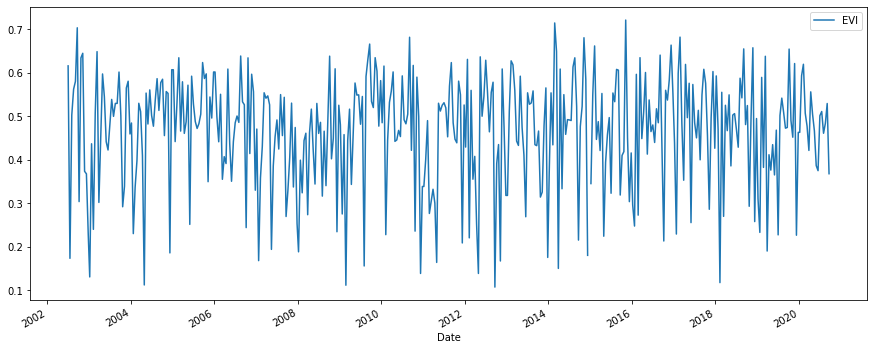

In [22]:
# Plotting

rcParams['figure.figsize'] = 15, 6
df.plot(y='EVI',x='Date')
plt.show()
